In [1]:
from qubecalib import Qube, PortFunc, PortNo, Lane
from qubecalib.meas import SimpleSendRecvProto
import qubecalib.meas as meas
qube = Qube(config_file_name='qube_riken_1-11.yml')
qube.config

{'bitfile': '0d60b9.bit',
 'ipfpga': '10.1.0.29',
 'iplsi': '10.5.0.29',
 'macfpga': '00-0A-35-0D-60-B9',
 'maclsi': '00-1B-1A-EE-01-28',
 'type': 'A'}

In [2]:
print(qube.ad9082[0].get_jesd_status())
print(qube.ad9082[1].get_jesd_status())
['{}: {}'.format(k, v.status) for k, v in qube.port.items()]

[['0x55E', '0xE0'], ['0x5BB', '0x11'], ['0x62E', '0x01'], ['pll_status', '0x01'], ['0x728', '0x0B']]
[['0x55E', '0xE0'], ['0x5BB', '0x11'], ['0x62E', '0x01'], ['pll_status', '0x01'], ['0x728', '0x0B']]


['0: RF = 13000.000 MHz LO = 12000    MHz IF = 1000.000 MHz LSB/USB: USB MODE AWG: Inactive',
 '1: RF = 13000.000 MHz LO = 12000    MHz IF = 1000.000 MHz ',
 '5: RF = 9500.000 MHz LO = 10500    MHz IF = 1000.000 MHz LSB/USB: LSB MODE AWG: Inactive',
 '6: RF = 11000.000 MHz LO = 12000    MHz IF = 1000.000 MHz LSB/USB: LSB MODE AWG: Inactive',
 '7: RF = 11000.000 MHz LO = 12000    MHz IF = 1000.000 MHz LSB/USB: LSB MODE AWG: Inactive',
 '8: RF = 11000.000 MHz LO = 12000    MHz IF = 1000.000 MHz LSB/USB: LSB MODE AWG: Inactive',
 '12: RF = 13000.000 MHz LO = 12000    MHz IF = 1000.000 MHz ',
 '13: RF = 13000.000 MHz LO = 12000    MHz IF = 1000.000 MHz LSB/USB: USB MODE AWG: Inactive']

In [3]:
import math
meas.LongSend.start(qube[PortNo.P5])

In [4]:
qube[PortNo.P5].set_freq(8500,11000)

(2515.625, -15.625)

In [36]:
print(qube[PortNo.P5].dac.nco.lsi.set_nco(freq=1*15.625*1e+6, ch=4, adc_mode=False, fine_mode=True))

set_nco: freq=15625000, ch=4, FINE_MODE, DAC_MODE
adi_ad9081_device_api_revision_get(...)
adi_ad9081_device_init(...)
api v1.2.0 commit e1ac8d2 for ad9081 
host is using little endian mode.
adi_ad9081_device_spi_config(...)
adi_ad9081_device_reg8_access_check(...)
adi_ad9081_device_power_status_check(...)
adi_ad9081_device_clk_config_set(...)
adi_ad9081_device_boot_pre_clock(...)
adi_ad9081_device_chip_id_get(...)
device is ad9082 r3
adi_ad9081_device_laminate_id_get(...)
adi_ad9081_device_die_id_get(...)
adi_ad9081_dac_digital_logic_enable_set(...)
adi_ad9081_device_aclk_receiver_enable_set(...)
adi_ad9081_device_clk_pll_enable_set(...)
adi_ad9081_adc_clk_div_set(...)
adi_ad9081_device_clk_up_div_set(...)
adi_ad9081_device_boot_post_clock(...)
adi_ad9081_adc_clk_enable_set(...)
adi_ad9081_dac_duc_nco_set(...)
adi_ad9081_dac_duc_nco_enable_set(...)
adi_ad9081_dac_chan_select_set(...)
adi_ad9081_hal_calc_tx_nco_ftw(...)
adi_ad9081_dac_duc_nco_ftw_set(...)
adi_ad9081_dac_chan_select_set(

In [7]:
o = SimpleSendRecvProto(
    duration = 1000e-9,
    wait_words = 0,
    readin_port = qube[PortFunc.Readin1],
    readout_awg = qube.awg[PortFunc.Readout1],
)

In [8]:
o.capture_delay = 0.85e-6
o.additional_captue_length = 0.2e-6
o.repeats = 1

a = qube.awg[PortFunc.Readout1]
w = o.new_sequence(a)
o.wave_property[a].mhz = 0

a = qube.awg[PortFunc.Ctrl2][Lane.L0]
w = o.new_sequence(a)
o.wave_property[a].mhz = 0
o.trigger = a

a = qube.awg[PortFunc.Ctrl2][Lane.L1]
w = o.new_sequence(a)
o.wave_property[a].mhz = 0

In [10]:
import math
def truncated_frequency(mhz):
    MAGIC_FREQ = 15.625
    return math.floor(mhz // MAGIC_FREQ) * MAGIC_FREQ

In [103]:
w = o.sequence[qube.awg[PortFunc.Readout1]]
t = w.timeline
w.iq[(500e-9 <= t) & (t < 900e-9)] = 1.0 + 1j * 0.0

wc0 = o.new_sequence()
w.iq[(500e-9 <= t) & (t < 900e-9)] = 1.0 + 1j * 0.0

wc10 = o.new_sequence()
w.iq[(500e-9 <= t) & (t < 900e-9)] = 1.0 + 1j * 0.0

wc11 = o.new_sequence()
w.iq[(500e-9 <= t) & (t < 900e-9)] = 1.0 + 1j * 0.0

wt00 = o.new_sequence()
w.iq[(500e-9 <= t) & (t < 900e-9)] = 1.0 + 1j * 0.0

wt01 = o.new_sequence()
w.iq[(500e-9 <= t) & (t < 900e-9)] = 1.0 + 1j * 0.0

wt02 = o.new_sequence()
w.iq[(500e-9 <= t) & (t < 900e-9)] = 1.0 + 1j * 0.0

# Wave Sequence を アサイン
o.assign(qube.awg[PortFunc.Ctrl2][Lane.L0], wc0)
o.assign(qube.awg[PortFunc.Ctrl2][Lane.L1], wc10)
o.assign(qube.awg[PortFunc.Ctrl3][Lane.L0], wt00)


In [101]:
p = PortFunc.Readout1 # ポートの選択
cnco_mhz, awg_mhz = qube[p].set_freq(10000, 9000) # 周波数の設定 (Coarse NCO)
qube[PortFunc.Readin1].adc.nco.freq = cnco_mhz
o.wave_property[qube.awg[p]].mhz = awg_mhz # AWG の変調周波数 (-200MHz ~ +200MHz ぐらいが実用範囲？)
qube[p].vatt = 0x800 # 出力の設定
print('AWG Frequency (Readout1) {} MHz'.format(awg_mhz), flush=True)

p = PortFunc.Ctrl0
nco_mhz, awg_mhz = qube[p].set_freq(10000, 11000)
o.wave_property[qube.awg[p][Lane.L0]].mhz = awg_mhz
qube[p].vatt = 0x800
print('AWG Frequency (Ctrl3) {} MHz'.format(awg_mhz), flush=True)
qube[p].dac.nco.lsi.set_nco(freq=-0*15.625*1e+6, ch=3, adc_mode=False, fine_mode=True)
o.wave_property[qube.awg[p][Lane.L1]].mhz = ???? 端数

p = PortFunc.Ctrl3
nco_mhz, awg_mhz = qube[p].set_freq(10000, 11000)
o.wave_property[qube.awg[p][Lane.L0]].mhz = awg_mhz
qube[p].vatt = 0x800
print('AWG Frequency (Ctrl3) {} MHz'.format(awg_mhz), flush=True)

['{}: {}'.format(k, v.status) for k, v in qube.port.items()]

AWG Frequency (Readout1) 15.625 MHz
AWG Frequency (Ctrl2) -15.625 MHz


['0: RF = 9000.000 MHz LO =  8000    MHz IF = 1000.000 MHz LSB/USB: USB MODE AWG: Inactive',
 '1: RF = 9000.000 MHz LO =  8000    MHz IF = 1000.000 MHz ',
 '5: RF = 11000.000 MHz LO = 12000    MHz IF = 1000.000 MHz LSB/USB: LSB MODE AWG: Inactive',
 '6: RF = 10000.000 MHz LO = 11000    MHz IF = 1000.000 MHz LSB/USB: LSB MODE AWG: Inactive',
 '7: RF = 9984.375 MHz LO = 11000    MHz IF = 1015.625 MHz LSB/USB: LSB MODE AWG: Inactive',
 '8: RF = 10000.000 MHz LO = 11000    MHz IF = 1000.000 MHz LSB/USB: LSB MODE AWG: Inactive',
 '12: RF = 9984.375 MHz LO =  9000    MHz IF = 984.375 MHz ',
 '13: RF = 9984.375 MHz LO =  9000    MHz IF = 984.375 MHz LSB/USB: USB MODE AWG: Inactive']

(0.0, 1.2e-06)

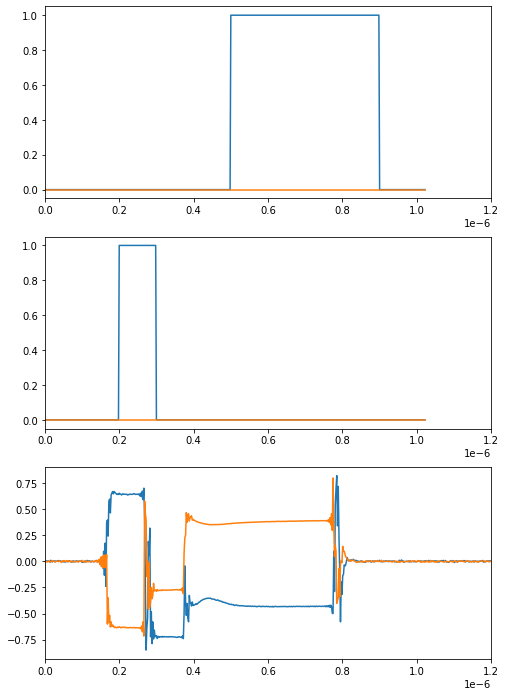

In [102]:
from e7awgsw import CaptureUnit
import numpy as np
o.capture_delay = 0.85e-6 # 冷凍機内へ打ち込んだ信号の応答が帰ってくるまでの遅延のための待機時間

%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3,1, figsize=(8,12))

awg = qube.awg[PortFunc.Readout1]
a = np.array(o.sequence[awg].iq)
t = np.array(o.sequence[awg].timeline)
ax[0].plot(t,np.real(a))
ax[0].plot(t,np.imag(a))
ax[0].set_xlim(0, 1.2e-6)
awg = qube.awg[PortFunc.Ctrl2][Lane.L0]
a = np.array(o.sequence[awg].iq)
t = np.array(o.sequence[awg].timeline)
ax[1].plot(t,np.real(a))
ax[1].plot(t,np.imag(a))
ax[1].set_xlim(0, 1.2e-6)

# Wave Sequence を 再アサイン
o.assign(qube.awg[PortFunc.Ctrl2][Lane.L0], wc0)
o.assign(qube.awg[PortFunc.Ctrl2][Lane.L1], wc10)
o.assign(qube.awg[PortFunc.Ctrl3][Lane.L0], wt00)
d = o.start()

a = d[CaptureUnit.U0]
b, t = o.downconv(a, qube.awg[PortFunc.Readout1])
ax[2].plot(t, np.real(b) / np.max(np.abs(b)))
ax[2].plot(t, np.imag(b) / np.max(np.abs(b)))
ax[2].set_xlim(0, 1.2e-6)



In [17]:
import inspect
import e7awgsw
import qubelsi
print(inspect.getsource(qubelsi.ad9082))

import os
import subprocess

import qubelsi.udpsendrecv

class AD9082:

    def __init__(self, addr, path, chip):
        self.addr = addr
        self.chip = str(chip)
        self.path = path
        self.handle = qubelsi.udpsendrecv.UDPSendRecv(addr, path)

    def _setenv(self):
        os.environ['TARGET_ADDR'] = self.addr
        os.environ['AD9082_CHIP'] = self.chip
    
    def read_info(self):
        self._setenv()
        ret = subprocess.check_output("{}/src/print_ad9082_info".format(self.path), encoding='utf-8')
        return ret

    def set_nco(self, freq, ch, adc_mode=False, fine_mode=False):
        self._setenv()
        cmd = ["{}/src/set_nco".format(self.path),
               "--channel={}".format(ch),
               "--freq={}".format(freq),
        ]
        if adc_mode:
            cmd.append("--adc-mode")
        if fine_mode:
            cmd.append("--fine-mode")
        ret = subprocess.check_output(cmd, encoding='utf-8')
        return ret

    def set_xbar(